# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from keras import optimizers, losses, metrics

In [19]:
def Grapic(yloss,yval,xp,yp,xv,yv):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
    font = FontProperties()
    font.set_name('Times New Roman')
    
    ax0.plot(yloss)
    ax0.plot(yval)
    ax0.set_ylabel('Loss')
    ax0.set_xlabel('Epoch')
    ax0.set_title('\n\nModel loss', color='C0', fontsize=15)
    ax0.legend(['Train', 'Test'], loc='best')
    ax0.grid(alpha=0.2)

    ax1.scatter(xp, yp,color='r',alpha=0.5, s=10.)
    ax1.plot(xv, yv)
    ax1.set_title('\n\nFIT', color='C0', fontsize=15)
    ax1.grid(alpha=0.4)
    
    fig.tight_layout()
    plt.show()

In [4]:
def Evaluate():
    # evaluate model
    print('\033[1m' + '\033[91m' + '\nEvaluate model' + '\033[0m')
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # evaluate model with the exact curve
    print('\033[1m' + '\033[91m' + '\nEvaluate model with the exact curve' + '\033[0m')
    score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [5]:
def Plot(xv,yv,yt):
    plt.figure(figsize=(10,5),tight_layout=True)
    plt.plot(xv, yt) 
    plt.scatter(xv, yv, color='r',alpha=0.4)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(alpha=0.4)
    plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.
$$f(x)=2x+1$$

In [10]:
# target parameters of f(x) = m*x + b
m = 2
b = 1

<br>

### $N_{train}=100$, $N_{epochs}=10$, $\sigma=0.2$

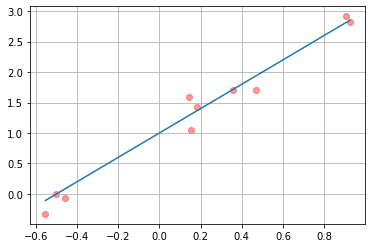

In [20]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)  # 1000 n train
x_valid = np.random.uniform(-1, 1, 10)   # 100  n validation
x_valid.sort()
y_target = m * x_valid + b               # ideal (target) linear function

sigma = 0.2                              # noise standard deviation
y_train = np.random.normal(m * x_train + b, sigma) # misure effettive da cui si vogliono indovinare i parametri di regressione
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)                # plotti la funzione di cui fare la regressione 
plt.scatter(x_valid, y_valid, color='r',alpha=0.4)   # plotti i punti della validazione
plt.grid(True); plt.show()


Model summary
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


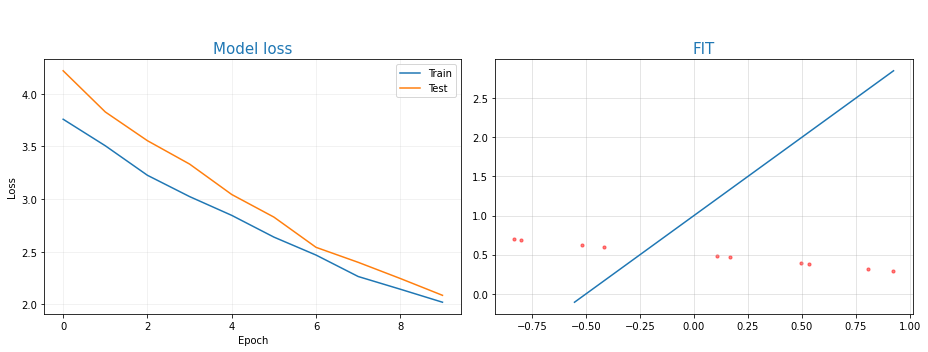

In [21]:
model = tf.keras.Sequential()          # modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # aggiungi layer iniziale con un solo nodo, che prende 1 solo input
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=10, shuffle=True, 
                    validation_data=(x_valid, y_valid),verbose=0)
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 10)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

<br>

### $N_{train}=1000$, $N_{epochs}=10$, $\sigma=0.2$

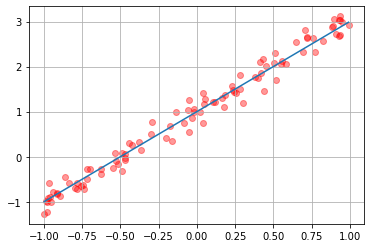

In [22]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.2
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r',alpha=0.4)
plt.grid(True); plt.show()


Model summary
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


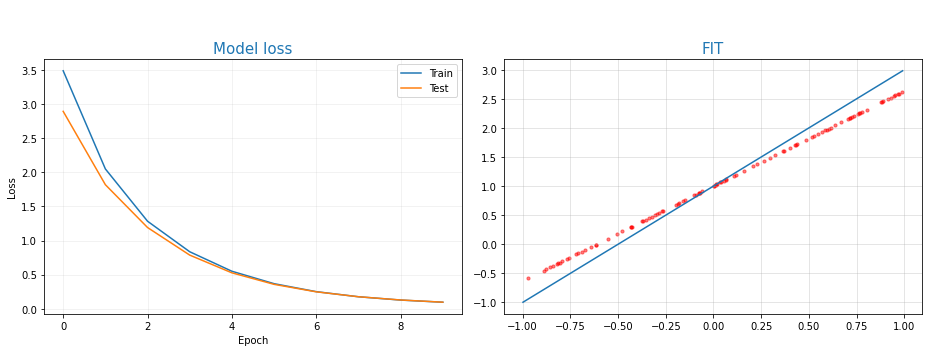

In [23]:
model = tf.keras.Sequential()          # modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # aggiungi layer iniziale con un solo nodo, che prende 1 solo input
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=10, shuffle=True, 
                    validation_data=(x_valid, y_valid),verbose=0)
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

<br>

### $N_{train}=10000$, $N_{epochs}=10$, $\sigma=0.2$

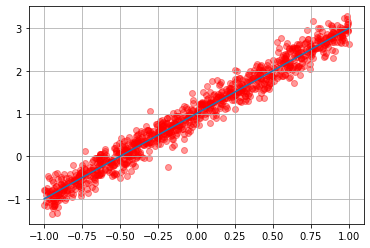

In [24]:
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = m * x_valid + b

sigma = 0.2
y_train = np.random.normal(m * x_train + b, sigma)
y_valid = np.random.normal(m * x_valid + b, sigma)

plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r',alpha=0.4)
plt.grid(True); plt.show()


Model summary
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


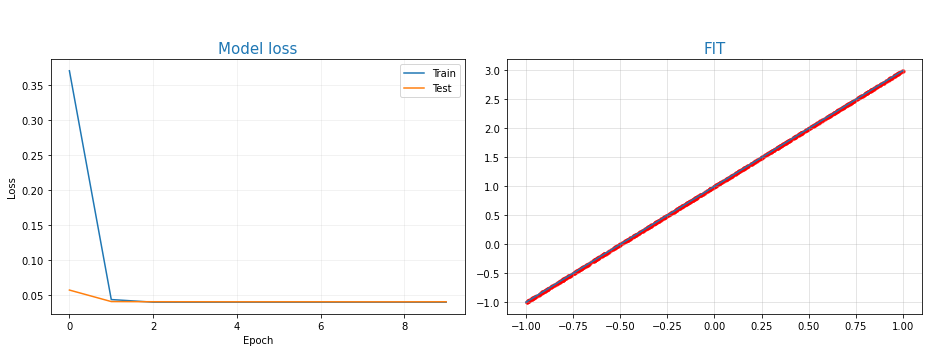

In [25]:
model = tf.keras.Sequential()          # modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # aggiungi layer iniziale con un solo nodo, che prende 1 solo input
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=10, shuffle=True, 
                    validation_data=(x_valid, y_valid),verbose=0)
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

<br>Aumentando il numero di dati di train, il risultato del fit migliora.
<br>Mantengo ora $N_{train}=10000$ e provo a cambiare $N_{epochs}$.

### $N_{train}=10000$, $N_{epochs}=50$, $\sigma=0.2$


Model summary
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


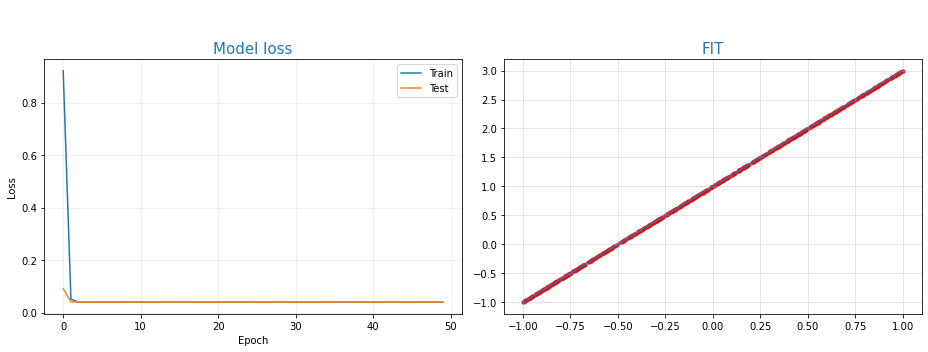

In [26]:
model = tf.keras.Sequential()          # modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # aggiungi layer iniziale con un solo nodo, che prende 1 solo input
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=50, shuffle=True, 
                    validation_data=(x_valid, y_valid),verbose=0)
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

<br>

### $N_{train}=10000$, $N_{epochs}=100$, $\sigma=0.2$


Model summary
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


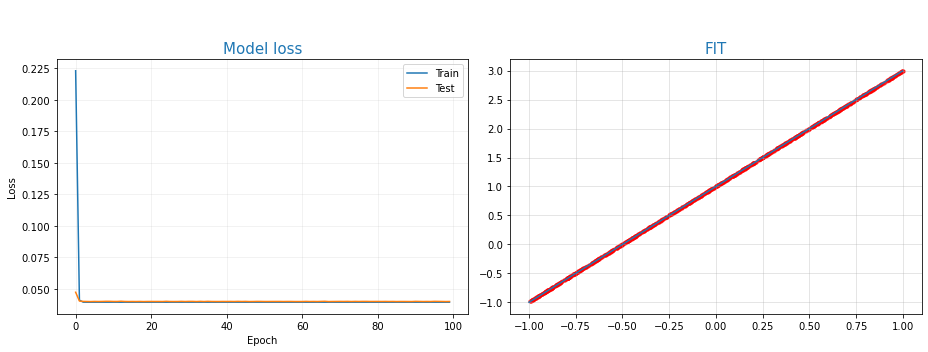

In [27]:
model = tf.keras.Sequential()          # modello sequenziale
model.add(Dense(1, input_shape=(1,)))  # aggiungi layer iniziale con un solo nodo, che prende 1 solo input
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=100, shuffle=True, 
                    validation_data=(x_valid, y_valid),verbose=0)
model.get_weights()
x_predicted = np.random.uniform(-1, 1, 1000)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

All'aumentare di $N_{epochs}$ il grafico della Loss migliora notevolmente.<br>
Nel prossimo esercizio userò di default $N_{epochs}=100$, $N_{train}\in [10000;15000]$. 

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

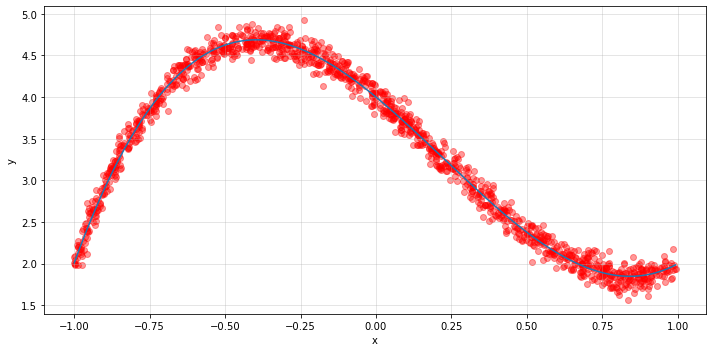

In [28]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1., 1.3, 13000)
x_valid = np.random.uniform(-1, 1, 1300)
x_valid.sort()
y_target = 4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid * x_valid

sigma = 0.1
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train * x_train + 3 * x_train * x_train * x_train, sigma)
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid * x_valid, sigma)

Plot(x_valid,y_valid,y_target)

<br><br>

### **(1)** <font face = "Tahoma" style="color:teal"><b> 5 layers</b> - <b>5 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>elu</b></font>


Model summary
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 78
Trainable params: 78
Non-trainable params: 0
_________________________________________________________________


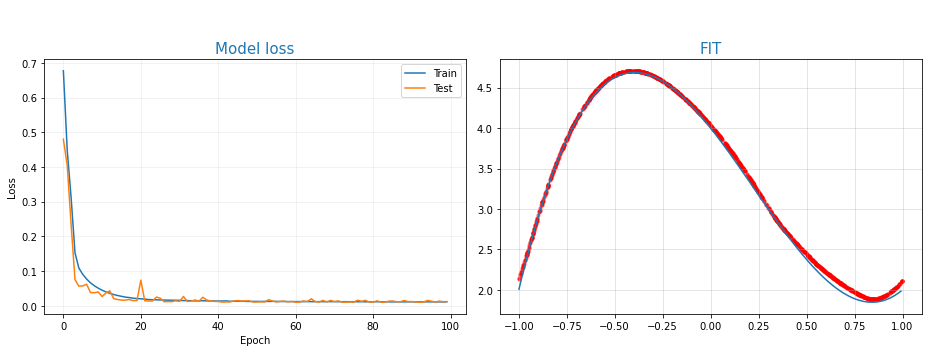

In [29]:
n=5
model = tf.keras.Sequential()
    # layers
model.add(Dense(1, input_shape=(1,), activation='elu'))
for i in range(1,4):
    model.add(Dense(n, activation='elu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

La loss oscilla e il fit non è perfetto. Provo ad aumentare il numero di neuroni nei layers.<br><br>

### **(2)** <font face = "Tahoma" style="color:teal"><b> 5 layers</b> - <b>10 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>elu</b></font>


Model summary
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


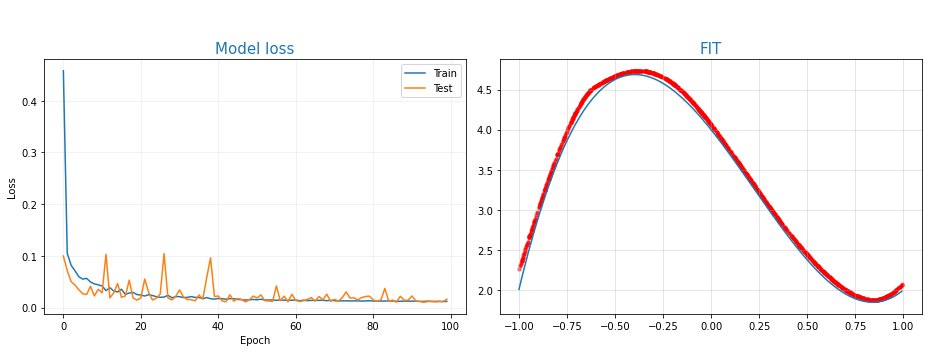

In [30]:
n=10
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='elu'))
for i in range(1,4):
    model.add(Dense(n, activation='elu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

La Loss di questo ultimo caso oscilla molto. Provo ad aumentare il numero di neuroni per layer da $10$ a $15$.<br><br>

### **(3)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>15 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>elu</b></font>


Model summary
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_21 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_22 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_23 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 16        
Total params: 766
Trainable params: 766
Non-trainable params: 0
_________________________________________________________________


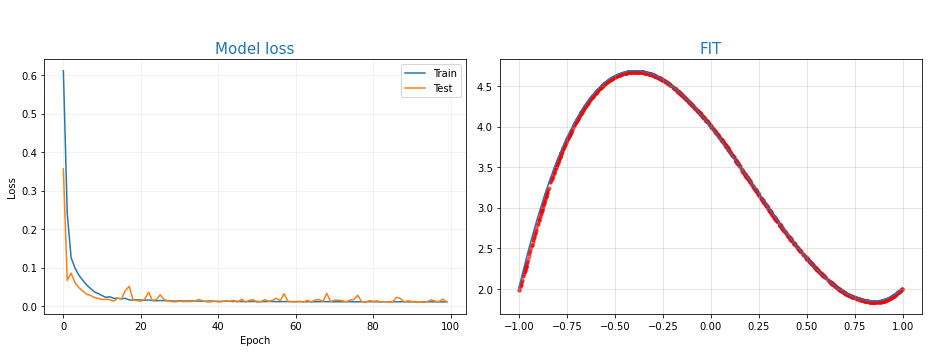

In [31]:
n=15
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='elu'))
for i in range(1,4):
    model.add(Dense(n, activation='elu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

Il fit è migliore ma la loss oscilla ancora.<br><br>

### **(4)** <font face = "Tahoma" style="color:teal"><b>10 layers</b> - <b>15 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>elu</b></font>


Model summary
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_81 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_82 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_83 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_84 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_85 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_86 (Dense)             (None, 15

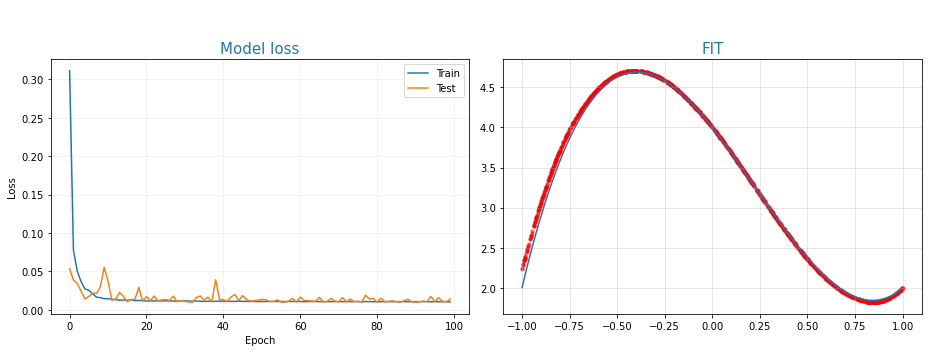

In [39]:
n=15
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='elu'))
for i in range(1,9):
    model.add(Dense(n, activation='elu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

La loss per $N_{layers}=10$ oscilla più che nel caso $N_{layers}=10$.<br><br>

### **(5)** <font face = "Tahoma" style="color:teal"><b>15 layers</b> - <b>15 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>elu</b></font>


Model summary
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_36 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_37 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_38 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_39 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_40 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_41 (Dense)             (None, 15

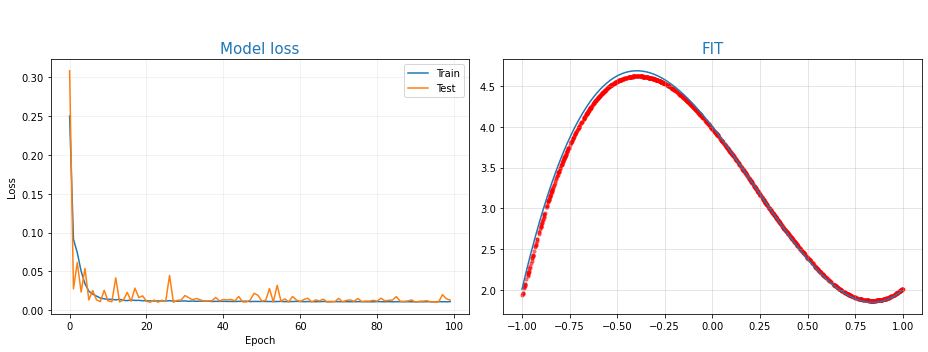

In [33]:
n=15
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='elu'))
for i in range(1,14):
    model.add(Dense(n, activation='elu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

All'aumentare del numero di layers, a parità di neuroni, la loss oscilla maggiormente. Rimango a 5 layers e provo ora a cambiare funzione di attivazione.

### **(6)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>10 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>relu</b></font>


Model summary
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


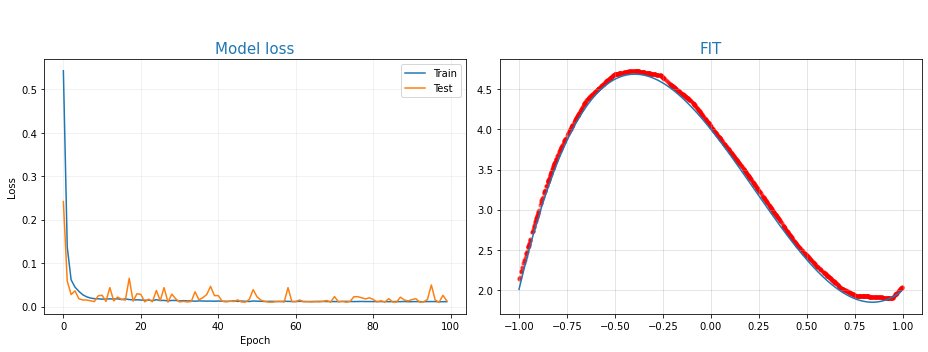

In [34]:
n=10
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='relu'))
for i in range(1,4):
    model.add(Dense(n, activation='relu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

### **(7)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>15 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>relu</b></font>


Model summary
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_56 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_57 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_58 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 16        
Total params: 766
Trainable params: 766
Non-trainable params: 0
_________________________________________________________________


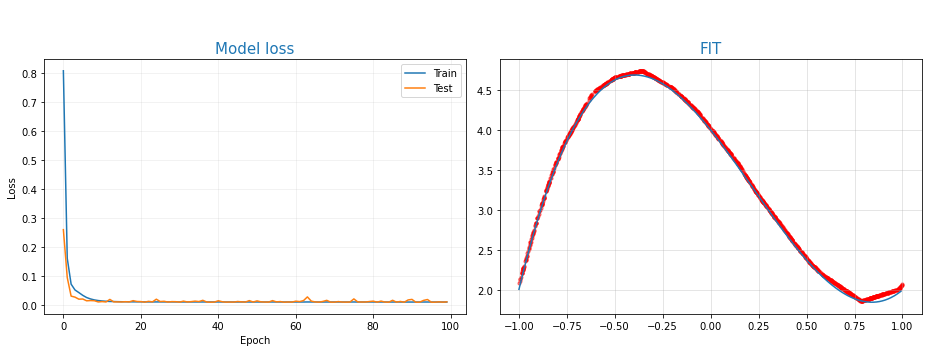

In [35]:
n=15
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='relu'))
for i in range(1,4):
    model.add(Dense(n, activation='relu'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

Provo ora a cambiare funzione di attivazione: tanh.
<br>

### **(8)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>10 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>tanh</b></font>


Model summary
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_91 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_92 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_93 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


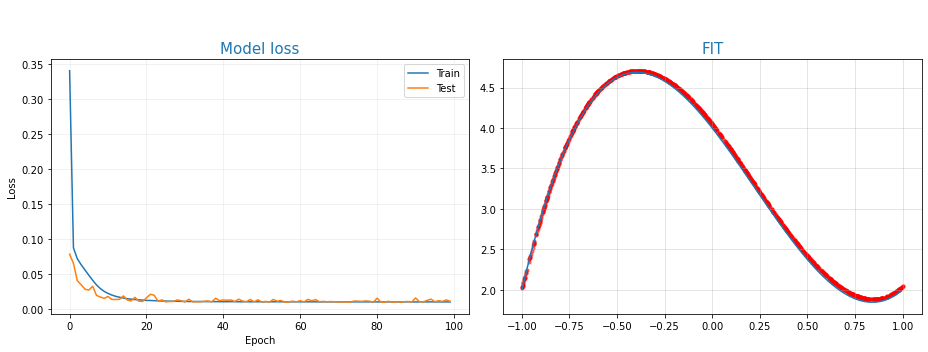

In [40]:
n=10
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='tanh'))
for i in range(1,4):
    model.add(Dense(n, activation='tanh'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

### **(9)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>15 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>tanh</b></font>


Model summary
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 15)                30        
_________________________________________________________________
dense_96 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_97 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_98 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 16        
Total params: 766
Trainable params: 766
Non-trainable params: 0
_________________________________________________________________


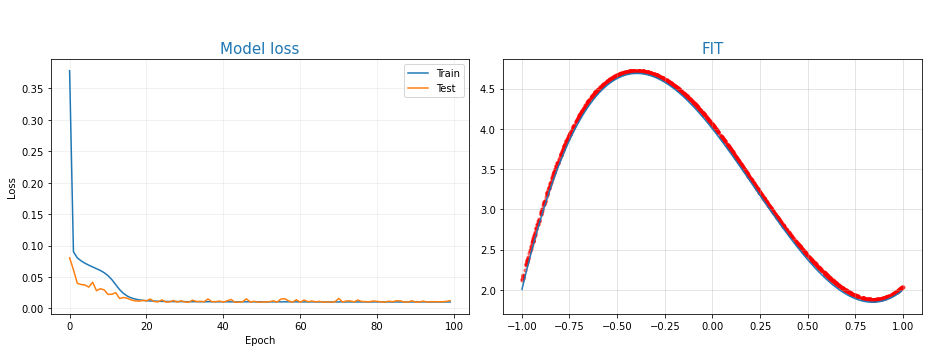

In [41]:
n=15
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='tanh'))
for i in range(1,4):
    model.add(Dense(n, activation='tanh'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

### **(10)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>30 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>tanh</b></font>


Model summary
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_101 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_102 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_103 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 31        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


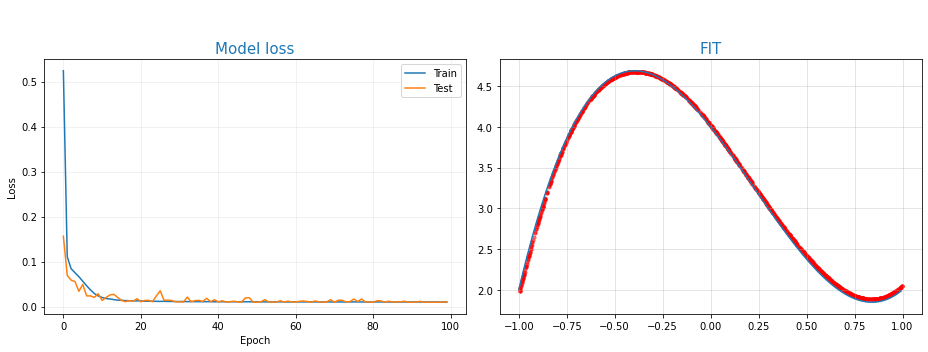

In [42]:
n=30
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='tanh'))
for i in range(1,4):
    model.add(Dense(n, activation='tanh'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-1, 1, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

La funzione di attivazione tanh oscilla molto anche se fitta abbastanza bene i dati.
<br><br>

### **(11)** <font face = "Tahoma" style="color:teal"><b>5 layers</b> - <b>30 neurons</b> per middle layer</font>
#### <font style="color:teal">Activation function: <b>tanh</b></font>
### <font face = "Tahoma" style="color:blue">How about points outside the original training data set? </font>

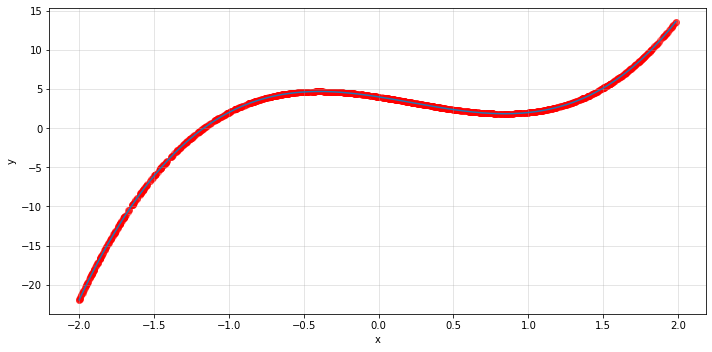

In [43]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 13000)
x_valid = np.random.uniform(-2, 2, 1300)
x_valid.sort()
y_target = 4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid * x_valid

sigma = 0.0                              # noise standard deviation
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train * x_train + 3 * x_train * x_train * x_train, sigma)
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid * x_valid, sigma)
Plot(x_valid,y_valid,y_target)


Model summary
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 30)                60        
_________________________________________________________________
dense_106 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_107 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_108 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_109 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_110 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_111 (Dense)            (None, 30

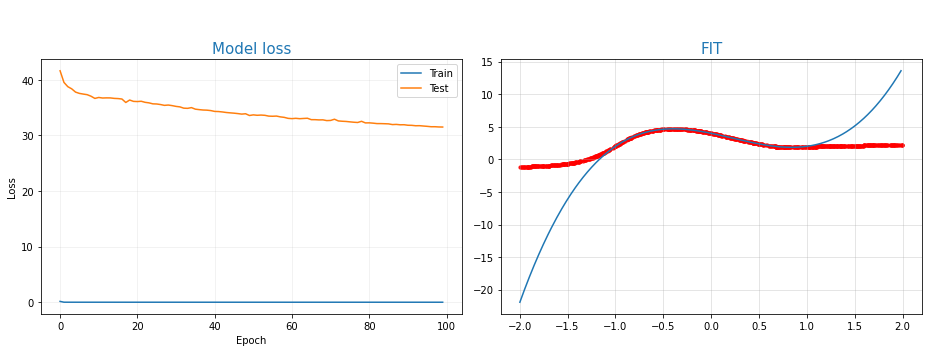

In [44]:
n=30
model = tf.keras.Sequential()
    # layers
model.add(Dense(n, input_shape=(1,), activation='tanh'))
for i in range(1,9):
    model.add(Dense(n, activation='tanh'))
model.add(Dense(1))
#compile model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
print('\033[1m' + '\033[91m' + '\nModel summary' + '\033[0m')
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100, shuffle=True, validation_data=(x_valid, y_valid), verbose=0)

score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)

x_predicted = np.random.uniform(-2, 2, 1300)
y_predicted = model.predict(x_predicted, batch_size=1)

Grapic(history.history['loss'],history.history['val_loss'],x_predicted,y_predicted,x_valid,y_target)

Fuori dal range di training i dati non fittano con la funzione, cosa che invece avviene in modo buono per i dati entro l'intervallo di training.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Sulla base dei precedenti studi ho deciso di costruire una NN utilizzando i seguenti parametri:
- Number of trials points = 13000
- Number of epochs = 100
- Noise = 0.1
- Number of layers = 5
- Number of neurons in each layer = 30
- Activation function = relu (con tanh la loss oscillava troppo)
- Loss function = MSE
- Opitmizer = SGD

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sympy as sp
from numpy import sin

def PlotLoss(yloss,yval):
    plt.figure(figsize = (10,5))
    plt.plot(yloss, label='Train-loss')
    plt.plot(yval, label='val-loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
    
def Plot3D_valid(xp,yp,xyp,xv,yv,ztar):
    zp = model.predict(xyp)
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    ax.plot(xv,yv,ztar,label='z_target',color='black')
    ax.plot_trisurf(xv, yv, ztar, linewidth=0.2, antialiased=True, cmap=cm.PuBu)
    ax.scatter(xp, yp, zp, color = 'r', s=3)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    #ax.view_init(elev=20., azim=-35)
    plt.show()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 30)                90        
_________________________________________________________________
dense_116 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_117 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_118 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 31        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


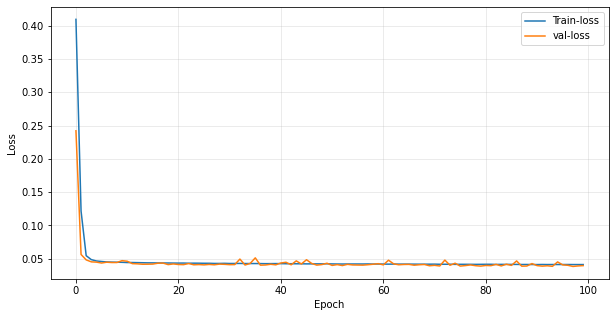

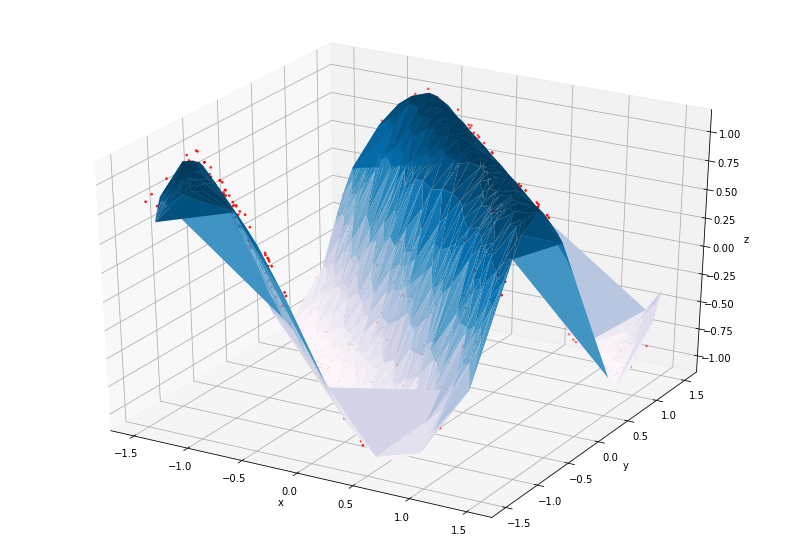

In [46]:
x_train = np.random.uniform(-1.5,1.5,13000)
y_train = np.random.uniform(-1.5,1.5,13000)
x_valid = np.random.uniform(-1.5,1.5,1000)
y_valid = np.random.uniform(-1.5,1.5,1000)

z_target = np.sin(x_valid*2+y_valid*2)

sigma = 0.2
z_train = np.random.normal(np.sin(x_train*2+y_train*2), sigma)
z_valid = np.random.normal(np.sin(x_valid*2+y_valid*2), sigma)

xy_train = np.array([x_train, y_train]).T
xy_valid = np.array([x_valid, y_valid]).T

model = Sequential()
#input layer
model.add(Dense(30, input_shape=(2,), activation='relu'))
#hidden layers
for i in range(1, 4):
    model.add(Dense(30, activation='relu'))
#readout layer
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, validation_data=(xy_valid, z_valid), verbose=0)

PlotLoss(history.history['loss'],history.history['val_loss'])


fig = plt.figure(figsize = (14,10)); ax = fig.gca(projection='3d')

ax.plot_trisurf(x_valid, y_valid, z_target, linewidth=0.2, antialiased=True, cmap=cm.PuBu)
x_predicted = np.random.uniform(-1.5,1.5,500)
y_predicted = np.random.uniform(-1.5,1.5,500)
xy_predicted = np.array([x_predicted, y_predicted]).T
z_predicted = model.predict(xy_predicted)

ax.scatter(x_predicted, y_predicted, z_predicted, color = 'r', s=3)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z'); plt.show()